Fermipy Tutorial

I strongly suggest to cd to this folder and run the tutorial along. 

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter, SEDPlotter
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
from astropy.io import fits

Before we start doing anything, we need to configure the entire analysis.

The configuration should be written into a .yaml file. 

Here in this example, this file is named as config.yaml

It is mostly important to get the configuration right before starting the processes. 

So we'll load the configuration file first, and have a look at each section of it. 

In [3]:
#Loading the configuration file for the ROI. 
#For how to construct it, you can refer to the comments in the configuration file. 
gta = GTAnalysis('config.yaml')

2021-06-09 14:00:18 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8


From here you can start figuring out what we have configured for the analysis. Easiest way to do so is simply print out the configuration: 

In [4]:
gta.__dict__

{'_rootdir': '/data/users/ysong/Fermipy_Tutorial',
 '_outdir': '/data/users/ysong/Fermipy_Tutorial',
 '_loglevel': 20,
 '_config': {'logging': {'prefix': '', 'chatter': 3, 'verbosity': 3},
  'fileio': {'outdir': '/data/users/ysong/Fermipy_Tutorial',
   'scratchdir': '/scratch',
   'workdir': '/data/users/ysong/Fermipy_Tutorial',
   'logfile': '/data/users/ysong/Fermipy_Tutorial/fermipy.log',
   'savefits': True,
   'workdir_regex': ['\\.fits$|\\.fit$|\\.xml$|\\.npy$'],
   'outdir_regex': ['\\.fits$|\\.fit$|\\.xml$|\\.npy$|\\.png$|\\.pdf$|\\.yaml$'],
   'usescratch': False},
  'optimizer': {'optimizer': 'NEWMINUIT',
   'tol': 0.05,
   'max_iter': 40,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0},
  'binning': {'projtype': 'WCS',
   'proj': 'AIT',
   'coordsys': 'CEL',
   'npix': None,
   'roiwidth': 14.0,
   'binsz': 0.1,
   'binsperdec': 9.0,
   'enumbins': None,
   'hpx_ordering_scheme': 'RING',
   'hpx_order': 10,
   'hpx_ebin': True},
  'sele

As you can see, there are a lot of things going on. 
Since we want to see what configuration we have done for the ROI analysis, let's focus on that.

In [5]:
roi_configuration=gta.__dict__['_config']

In [6]:
#This is all the possible sections of the configuration that we might need to set up.
#Some of these are very basic and need to be done anyway.
#some of these are advanced analysis that we probably don't really need to do. 
#Each of these is the wrapper to use one or a few Fermi tools.
roi_configuration.keys()

dict_keys(['logging', 'fileio', 'optimizer', 'binning', 'selection', 'model', 'data', 'ltcube', 'gtlike', 'mc', 'residmap', 'tsmap', 'tscube', 'sourcefind', 'sed', 'lightcurve', 'extension', 'localize', 'roiopt', 'plotting', 'components'])

In [7]:
#Selection part is for gtselect & gtmktime together. 
#These parameters ought to look familiar :)
#You need to do this if you start with raw even file and configure it like this would mean 
roi_configuration['selection']

{'emin': 100.0,
 'emax': 500000.0,
 'logemin': None,
 'logemax': None,
 'tmin': 239160000,
 'tmax': 644198000,
 'zmax': 90.0,
 'evclass': 128,
 'evtype': 3,
 'convtype': None,
 'phasemin': None,
 'phasemax': None,
 'target': None,
 'ra': 140.558425,
 'dec': 6.639806,
 'glat': None,
 'glon': None,
 'radius': None,
 'filter': None,
 'roicut': 'no'}

Of course there are ways to construct the configuration as you go throughout the pipeline. 

Examples follow (I personally feel it is better to configure everything first.):

In [8]:
import yaml
# Load a configuration
config = yaml.load(open('config.yaml'))
# Update a parameter and write a new configuration
config['selection']['emin'] = 1000.
yaml.dump(config, open('new_config.yaml','w'))

/data/shared_data/anaconda3/envs/fermipy/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


But of course be sure to update the configuration file before you start your analysis.

Otherwise you need to start all over again!!

Now all the configuration of the basic analysis you'll need can be found in the 'config.yaml' file. 

I tried to comment and notate it as much as possible, so let me know which ones are not clear. 

Once we are all set with the configuration, we can start setting up the analysis. 

In [9]:
matplotlib.interactive(True) ##This is needed for Fermipy to make all the plots. 
gta.setup() 

2021-06-09 14:13:08 INFO    GTAnalysis.setup(): Running setup.
2021-06-09 14:13:08 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2021-06-09 14:13:08 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2021-06-09 14:13:08 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/data/users/ysong/fdata/lat_source_zmax90_gti_30MeV_500GeV.fits outfile=/data/users/ysong/Fermipy_Tutorial/ft1_00.fits ra=140.558425 dec=6.639806 rad=10.399494936611667 tmin=239160000.0 tmax=644198000.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2021-06-09 14:13:08 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2021-06-09 14:13:08 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) != o0) && ((EVENT_TYPE&o3) != o0) && angsep(RA,DEC,140.558425,6.639806) < 10.39949494 && 100 < ENERGY && ENERGY <= 500000 && 23916000

2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0859.8+0053
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0946.2+0104
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0849.5+0456
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0905.6+1358
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0955.2+0835
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0848.7+0508
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0914.1-0202
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0948.9+0022
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0845.4+0442
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0848.9+0205
2021-06-09 14:23:31 

2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0843.0-0853
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1002.5+2215
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1018.1+1905
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0956.5-0958
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0836.2+2141
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0856.6-1105
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1028.4-0234
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1036.5+1231
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1039.6+0535
2021-06-09 14:23:31 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1040.5+0617
2021-06-09 14:23:31 

2021-06-09 14:24:53 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0917.3-0342 34....................!
2021-06-09 14:24:54 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0918.9-0625 34....................!
2021-06-09 14:24:56 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0920.3-0443 34....................!
2021-06-09 14:24:57 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0921.7+2336 34....................!
2021-06-09 14:24:59 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0922.4-0528 34....................!
2021-06-09 14:25:01 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0922.6+0434 34....................!
2021-06-09 14:25:02 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0924.0+0534 34....................!
2021-06-09 14:25:04 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0927.2+2454 34....................!


2021-06-09 14:29:10 INFO    GTAnalysis.setup(): Finished setup.


Now as you can see in the output from the last cell, this step actually takes care of a lot of things in the analysis. 

1). It does gtselect with the stated criteria in your configuration. 

2). It should do gtmktime as well, but since I'm using an all-sky file that I pre-selected and filtered by GTIs, we're skipping this part. 

3). It normally does gtltcube too, but again I chose to use an exisitng file.
3.1) Note here that if we don't mess around with the timing and zenith cut selection at all, we can use the same ltcube file for all the analysis. 

4). It does gtbin to create counts cube, gtexpcube2 twice to create an exposure map at the ROI and an all-sky exposure map.

5). It does gtsrcmaps to create the source maps based on the model configurations we provided. 

Now up to this point the set-up should be done. Notice that it might take a long long time... 

I think we all are trying to detect new sources here, so let's add that new source into the model. 

In [10]:
name='PSR J0922+0638'
ra=140.558425
dec=6.639806

In [12]:
gta.add_source(name, #name of the source 
               { 'ra' : ra , 'dec' : dec, #location
                'SpectrumType' : 'PLSuperExpCutoff', 'Index1':-1.5, 'Index2' : 1.0,'Scale' : 1000,'Prefactor':1e-9,'Cutoff':1e3,'SpatialModel' : 'PointSource' }) #and spectral parameters.

2021-06-09 14:29:53 INFO    GTAnalysis.add_source(): Adding source PSR J0922+0638


Now of course everything is ready and we can start the fitting (gtlike) process.

But let's actually free the parameters for the sources near the ROI center and the backgrounds. 

In [13]:
gta.free_sources(distance=5) #this is freeing the parameters of ths sources within 5 degrees of the ROI center. 
gta.free_source('galdiff')
gta.free_source('isodiff')

2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for PSR J0922+0638        : ['Index1', 'Cutoff']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0924.0+0534     : ['Prefactor', 'Index']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0922.6+0434     : ['Prefactor', 'Index']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0935.3+0901     : ['norm', 'alpha', 'beta']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0914.4+0249     : ['Prefactor', 'Index']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0932.7+1041     : ['Prefactor', 'Index']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2021-06-09 14:31:50 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor', 'Index']


Now the next part is a little arbitraty as it seems like optimization is not always needed before doing fitting.

It doesn't hurt to do it though (except that it can be a little slow). So let's start with that.

In [15]:
gta.optimize()

2021-06-09 14:33:14 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['PSR J0922+0638', 'galdiff', 'isodiff']
Fitting shape 4FGL J0948.9+0022 TS:   5757.341
Fitting shape galdiff TS:   5304.147
Fitting shape isodiff TS:   4289.281
Fitting shape 4FGL J0946.6+1016 TS:   3550.990
Fitting shape 4FGL J0909.1+0121 TS:   3251.745
Fitting shape 4FGL J0909.6+0159 TS:    868.042
Fitting shape 4FGL J0922.6+0434 TS:    461.692


/data/shared_data/anaconda3/envs/fermipy/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J0935.3+0901 TS:    339.093
Fitting shape 4FGL J0930.9+0033 TS:    307.369
Fitting shape 4FGL J0950.2+0615 TS:    118.574
Fitting shape 4FGL J0946.2+0104 TS:     92.052
Fitting shape 4FGL J0924.0+0534 TS:     87.952
Fitting shape 4FGL J0932.7+1041 TS:     68.318
Fitting shape 4FGL J0949.2+1749 TS:     60.619
Fitting shape 4FGL J0914.4+0249 TS:     42.849
Fitting shape 4FGL J0859.8+0053 TS:     33.799
Fitting shape 4FGL J0947.9+1121 TS:     30.671
Fitting shape 4FGL J0905.6+1358 TS:     28.051


2021-06-09 14:36:03 INFO    GTAnalysis.optimize(): Finished
2021-06-09 14:36:03 INFO    GTAnalysis.optimize(): LogLike: -185326.022169 Delta-LogLike: 581389.293168
2021-06-09 14:36:03 INFO    GTAnalysis.optimize(): Execution time: 168.59 s


{'loglike0': -766715.3153369192,
 'loglike1': -185326.0221688279,
 'dloglike': 581389.2931680912,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'NEWMINUIT',
   'tol': 0.05,
   'max_iter': 40,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

Now we can do gtlike finally.

In [16]:
gta.fit()

2021-06-09 14:36:03 INFO    GTAnalysis.fit(): Starting fit.
2021-06-09 14:36:27 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status: 156
2021-06-09 14:36:27 INFO    GTAnalysis.fit(): LogLike:  -185305.802 DeltaLogLike:       20.220 


{'fit_quality': 3,
 'fit_status': 156,
 'fit_success': True,
 'dloglike': 20.219984578812728,
 'edm': 0.056120820583411786,
 'loglike': -185305.8021842491,
 'covariance': array([[ 4.76400931e-02, -4.80719517e-03, -1.37279358e-03,
         -7.31625763e-04,  6.33237472e-04,  2.18541024e-04,
          6.42278647e-04,  5.10342992e-04,  2.49228253e-04,
          9.43107985e-04, -5.77399871e-04,  1.60741597e-08,
          6.27757305e-04,  5.23800230e-04,  1.57993068e-04,
          2.30772871e-05, -4.11165097e-04],
        [-4.80719517e-03,  1.60313527e-02, -1.25403348e-03,
         -7.92213169e-04,  4.31729627e-04,  1.98880947e-04,
          2.92141180e-04,  3.80836207e-04, -1.45774513e-05,
          9.81215783e-04, -5.95702217e-04,  8.14164327e-07,
         -6.51238953e-04, -2.64095034e-03,  1.66387073e-04,
         -5.30196663e-05, -2.78545027e-04],
        [-1.37279358e-03, -1.25403348e-03,  8.62012350e-03,
          7.29084643e-04, -5.09162315e-03, -2.22865406e-03,
          2.50109993e-

Ok now all the basic analysis that we usually do is done. 

Quite easy isn't it. 

Let's have a look at the results:

In [17]:
gta.print_roi()

2021-06-09 14:36:51 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
PSR J0922+0638      PointSource    PLSuperExpCuto    0.000     40.73      1041.1
4FGL J0924.0+0534   PointSource    PowerLaw          1.158     76.73       346.2
4FGL J0922.6+0434   PointSource    PowerLaw          2.065    412.56      2736.3
4FGL J0935.3+0901   PointSource    LogParabola       4.029    309.22      2252.7
4FGL J0914.4+0249   PointSource    PowerLaw          4.273     53.55       983.7
4FGL J0932.7+1041   PointSource    PowerLaw          4.808     59.17       387.4
4FGL J0909.6+0159   PointSource    PowerLaw          5.602    872.50      2940.1
4FGL J0935.5+1152   PointSource    PowerLaw          6.186     19.16        53.4
4FGL J0909.1+0121   PointSource    LogParabola       6.205   3326.87      8486.5
4FGL J0930.9+0033   PointSource    PowerLaw          6.4

Voila. Source names, TS values, and distance from the ROI. 

Of course there are much more information. It also can be written into files.

In [18]:
gta.write_roi(name+'_v1')

2021-06-09 14:42:28 INFO    GTBinnedAnalysis.write_xml(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_v1_00.xml...
2021-06-09 14:42:28 INFO    GTAnalysis.write_fits(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_v1.fits...
2021-06-09 14:42:41 INFO    GTAnalysis.write_roi(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_v1.npy...


Now this output can be read with numpy, and it has all the details you'll need in it. Let's have a look. 

Note that this is similar to a data frame, and you can idnex it as such with keywords.

In [22]:
output_v1=np.load(name+'_v1.npy',allow_pickle=True).flat[0]

In [23]:
output_v1.keys()

dict_keys(['roi', 'config', 'version', 'stversion', 'sources', 'lck_params'])

In [25]:
output_v1['sources'][name]

{'name': 'PSR J0922+0638',
 'Source_Name': 'PSR J0922+0638',
 'SpatialModel': 'PointSource',
 'SpatialWidth': None,
 'SpatialType': 'SkyDirFunction',
 'SourceType': 'PointSource',
 'SpectrumType': 'PLSuperExpCutoff',
 'Spatial_Filename': None,
 'Spectrum_Filename': None,
 'correlation': {'PSR J0922+0638': 1.0,
  'galdiff': -0.1209032332738038,
  'isodiff': 0.1053919700914546,
  '4FGL J0914.4+0249': 0.00019658513878484935,
  '4FGL J0922.6+0434': 0.05999764822775202,
  '4FGL J0924.0+0534': -0.05278737856833796,
  '4FGL J0932.7+1041': -0.0018249295535273126,
  '4FGL J0935.3+0901': -0.01974064613132802},
 'model_counts': array([1.67418577e+02, 1.70025409e+02, 1.58208296e+02, 1.36959871e+02,
        1.12683598e+02, 8.92700494e+01, 6.79044363e+01, 4.95216072e+01,
        3.47985788e+01, 2.34379734e+01, 1.47212034e+01, 8.48582311e+00,
        4.41652146e+00, 2.03818559e+00, 8.13158230e-01, 2.71803691e-01,
        7.42759062e-02, 1.55495674e-02, 2.25853982e-03, 2.07100535e-04,
        1.046205

In [26]:
output_v1['sources'][name]['flux'],output_v1['sources'][name]['ts']#,output_v1['sources'][name]['ra'],....

(4.830821458311782e-09, 40.72795937297633)

Now we want to see if there's any source that has large TS values yet not modeled. 

Fermipy does this very easily. 

First we need to assume the type of sources that we want to find. This is just an estimate.

In [27]:
model = {'Index' : 2.0, 'SpatialModel' : 'PointSource'} #We try to find Power Law point sources with an index of 2.

Now we can specify this and find new sources.

In [28]:
srcs = gta.find_sources(model=model, #specify the models we used above. 
                        sqrt_ts_threshold=5.0, #This is defining the TS threshold of defining the source as detected. 
                        min_separation=0.3) #This is the minimum angular separation of sources. 

2021-06-09 14:54:41 INFO    GTAnalysis.find_sources(): Starting.
2021-06-09 14:54:41 INFO    GTAnalysis.tsmap(): Generating TS map
2021-06-09 14:54:44 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2021-06-09 14:55:36 INFO    GTAnalysis.tsmap(): Finished TS map
2021-06-09 14:55:45 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/users/ysong/Fermipy_Tutorial/sourcefind_00_pointsource_powerlaw_2.00_tsmap.npy
2021-06-09 14:55:45 INFO    GTAnalysis.tsmap(): Execution time: 63.94 s
2021-06-09 14:55:45 INFO    GTAnalysis._build_src_dicts_from_peaks(): Found source
name: PS J0916.7+0956
ts: 29.224341
2021-06-09 14:55:45 INFO    GTAnalysis.add_source(): Adding source PS J0916.7+0956
2021-06-09 14:55:48 INFO    GTAnalysis.free_source(): Fixing parameters for PS J0916.7+0956       : ['Prefactor']
2021-06-09 14:55:48 INFO    GTAnalysis._find_sources_iterate(): Performing spectral fit for PS J0916.

This process automatically updates the model by adding these newly found extra sources. 

The sources named as PS JXXXXX+/-XXXX.

Example: PS J0916.7+0956, 3.5 degrees away from ROI center, and TS = 34.6

In [33]:
gta.print_roi()

2021-06-09 15:00:01 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
PSR J0922+0638      PointSource    PLSuperExpCuto    0.000     39.12       969.4
4FGL J0924.0+0534   PointSource    PowerLaw          1.158     77.25       359.0
4FGL J0922.6+0434   PointSource    PowerLaw          2.065    418.30      2782.1
PS J0916.7+0956     PointSource    PowerLaw          3.562     34.59       630.4
4FGL J0935.3+0901   PointSource    LogParabola       4.029    313.05      2271.8
4FGL J0914.4+0249   PointSource    PowerLaw          4.273     55.87      1038.5
4FGL J0932.7+1041   PointSource    PowerLaw          4.808     59.25       382.1
4FGL J0909.6+0159   PointSource    PowerLaw          5.602    872.50      2940.1
4FGL J0935.5+1152   PointSource    PowerLaw          6.186     19.16        53.4
4FGL J0909.1+0121   PointSource    LogParabola       6.2

If you want to be more cautious, fit the ROI again!

In [35]:
gta.fit()

2021-06-09 15:01:49 INFO    GTAnalysis.fit(): Starting fit.
/data/shared_data/anaconda3/envs/fermipy/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2021-06-09 15:02:05 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status: 156
2021-06-09 15:02:05 INFO    GTAnalysis.fit(): LogLike:  -185288.619 DeltaLogLike:        0.001 


{'fit_quality': 3,
 'fit_status': 156,
 'fit_success': True,
 'dloglike': 0.0012502240133471787,
 'edm': 0.0013698212712260748,
 'loglike': -185288.61917883522,
 'covariance': array([[ 4.80270192e-02, -5.89977459e-03, -1.32913792e-03,
         -7.04259190e-04,  6.40836865e-04,  2.20729445e-04,
          6.33537577e-04,  4.84329541e-04,  2.44372278e-04,
          9.02902245e-04, -5.57998369e-04, -1.70317770e-07,
          9.14092897e-04,  1.28738594e-03,  1.57287893e-04,
          2.72874155e-05, -4.10026581e-04],
        [-5.89977459e-03,  1.56272995e-02, -1.25818792e-03,
         -8.05173724e-04,  4.51612390e-04,  2.09505588e-04,
          2.86032271e-04,  3.68719428e-04, -2.76888799e-05,
          9.84616427e-04, -6.02584720e-04,  9.14730044e-07,
         -7.67451125e-04, -3.20790830e-03,  1.73974987e-04,
         -5.29555379e-05, -2.87661716e-04],
        [-1.32913792e-03, -1.25818792e-03,  8.68143865e-03,
          7.07985911e-04, -5.29526200e-03, -2.31727432e-03,
          2.47666

In [36]:
gta.print_roi() #see if this improves the results?

2021-06-09 15:02:43 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
PSR J0922+0638      PointSource    PLSuperExpCuto    0.000     39.23       967.6
4FGL J0924.0+0534   PointSource    PowerLaw          1.158     77.35       358.1
4FGL J0922.6+0434   PointSource    PowerLaw          2.065    418.42      2772.2
PS J0916.7+0956     PointSource    PowerLaw          3.562     34.59       630.4
4FGL J0935.3+0901   PointSource    LogParabola       4.029    312.89      2271.4
4FGL J0914.4+0249   PointSource    PowerLaw          4.273     55.96      1037.0
4FGL J0932.7+1041   PointSource    PowerLaw          4.808     59.25       384.1
4FGL J0909.6+0159   PointSource    PowerLaw          5.602    872.50      2940.1
4FGL J0935.5+1152   PointSource    PowerLaw          6.186     19.16        53.4
4FGL J0909.1+0121   PointSource    LogParabola       6.2

Doesn't look like it. But it's still good we tried to fit again to confirm. 

Next we would want to do source localization, aka tryiong to fit the spatial parameters of the source. 

Usually the default settings by the function wouuld be sufficient, but in case if not, there are a few things that can be twicked. 

dtheta_max is the half-width of the search region. 

fix_shape is to indicate if you don't want to fit the spectral parameters again. 

free_background is to set everything free in the ROI to fit. It might be the best way to do but freeing this is extremely slow.

free_radius sets the sources within certain degrees of ROI center free to be fitted. An alternative to the above. 

In [37]:
gta.localize(name, make_plots=True)

2021-06-09 16:33:34 INFO    GTAnalysis.localize(): Running localization for PSR J0922+0638
2021-06-09 16:34:04 INFO    GTAnalysis._localize(): Localization succeeded.
2021-06-09 16:34:04 INFO    GTAnalysis._localize(): Updating source PSR J0922+0638 to localized position.
2021-06-09 16:34:04 INFO    GTAnalysis.delete_source(): Deleting source PSR J0922+0638
2021-06-09 16:34:04 INFO    GTAnalysis.add_source(): Adding source PSR J0922+0638
2021-06-09 16:34:09 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  140.6559 +/-   0.0492,    6.7878 +/-   0.0499)
(glon,glat) = (  225.3170 +/-   0.0443,   36.5488 +/-   0.0543)
offset =   0.1769 r68 =   0.0740 r95 =   0.1194 r99 =   0.1481
2021-06-09 16:34:09 INFO    GTAnalysis._localize(): LogLike:  -185283.889 DeltaLogLike:        4.730
2021-06-09 16:34:09 INFO    GTAnalysis.localize(): Finished localization.
2021-06-09 16:34:16 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of

MutableNamedTuple([('name', 'PSR J0922+0638'),
                   ('file', 'psr_j0922+0638_loc.fits'),
                   ('config',
                    {'nstep': 5,
                     'dtheta_max': 0.5,
                     'free_background': False,
                     'fix_shape': False,
                     'free_radius': None,
                     'update': True,
                     'tsmap_fitter': 'tsmap',
                     'make_plots': True,
                     'write_fits': True,
                     'write_npy': True,
                     'optimizer': {'optimizer': 'NEWMINUIT',
                      'tol': 0.05,
                      'max_iter': 40,
                      'init_lambda': 0.0001,
                      'retries': 3,
                      'min_fit_quality': 2,
                      'verbosity': 0},
                     'use_cache': True,
                     'prefix': ''}),
                   ('ra', 140.655885394029),
                   ('dec', 6.7878347763

And we can check the results of it.

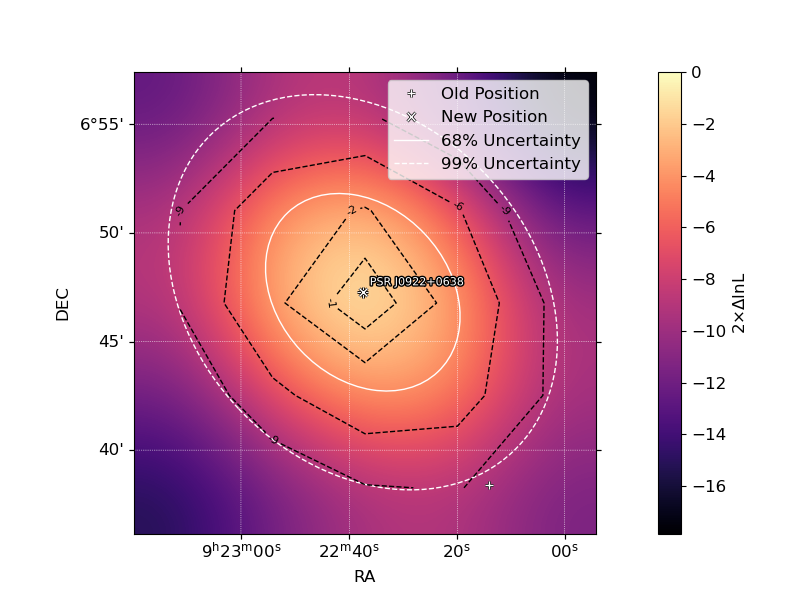

In [38]:
Image('psr_j0922+0638_localize_peak.png')

In [39]:
Now all the things are read for us to plot the TS map without the central source and make SED of the source. 

To do TS map, we need to again use the assumed model for sources above when we were finding sources. 

SyntaxError: invalid syntax (<ipython-input-39-01bb55fa89d3>, line 1)

In [41]:
maps=gta.tsmap('ft1',exclude=[name],make_plots=True) #You can change the filename as you like. 

2021-06-09 16:38:00 INFO    GTAnalysis.tsmap(): Generating TS map
2021-06-09 16:38:03 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2021-06-09 16:38:55 INFO    GTAnalysis.tsmap(): Finished TS map
2021-06-09 16:39:05 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/users/ysong/Fermipy_Tutorial/ft1_pointsource_powerlaw_2.00_tsmap.npy
2021-06-09 16:39:05 INFO    GTAnalysis.tsmap(): Execution time: 64.49 s


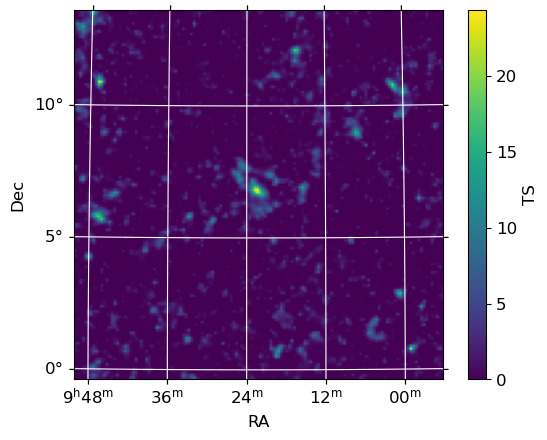

In [45]:
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('ft1_pointsource_powerlaw_2.00_tsmap.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
image=plt.imshow(hdu.data)
plt.colorbar(image, label='TS')
plt.grid(color='white', ls='solid')
plt.xlabel('RA')
plt.ylabel('Dec')

In [47]:
gta.sed(name,
        loge_bins=gta.log_energies[::2], #This is to choose the energy bins to do the SED in.
                                         #The way this is doing right now is to use exisiting binning we specified 
                                         #in the configuration and combine two bins together. 
        make_plots=True) 

2021-06-09 17:53:13 INFO    GTAnalysis.sed(): Computing SED for PSR J0922+0638
2021-06-09 17:53:17 INFO    GTAnalysis._make_sed(): Fitting SED
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for PSR J0922+0638        : ['Index1', 'Cutoff']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0924.0+0534     : ['Index']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0922.6+0434     : ['Index']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0935.3+0901     : ['alpha', 'beta']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0914.4+0249     : ['Index']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0932.7+1041     : ['Index']
2021-06-09 17:53:17 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Index']
2021-06-09 17:53:32 INFO    GTAnalysis.sed(): Finished SED
2021-06-0

{'name': 'PSR J0922+0638',
 'loge_min': array([2.     , 2.22418, 2.44836, 2.67254, 2.89672, 3.1209 , 3.34508,
        3.56926, 3.79344, 4.01762, 4.2418 , 4.46598, 4.69016, 4.91434,
        5.13852, 5.3627 ]),
 'loge_max': array([2.22418, 2.44836, 2.67254, 2.89672, 3.1209 , 3.34508, 3.56926,
        3.79344, 4.01762, 4.2418 , 4.46598, 4.69016, 4.91434, 5.13852,
        5.3627 , 5.58688]),
 'loge_ctr': array([2.11209, 2.33627, 2.56045, 2.78463, 3.00881, 3.23299, 3.45717,
        3.68135, 3.90553, 4.12971, 4.35389, 4.57807, 4.80225, 5.02643,
        5.25061, 5.47479]),
 'loge_ref': array([2.11209, 2.33627, 2.56045, 2.78463, 3.00881, 3.23299, 3.45717,
        3.68135, 3.90553, 4.12971, 4.35389, 4.57807, 4.80225, 5.02643,
        5.25061, 5.47479]),
 'e_min': array([1.00000000e+02, 1.67563723e+02, 2.80776011e+02, 4.70478736e+02,
        7.88351685e+02, 1.32099143e+03, 2.21350241e+03, 3.70902704e+03,
        6.21498379e+03, 1.04140582e+04, 1.74501836e+04, 2.92401772e+04,
        4.89959294e+

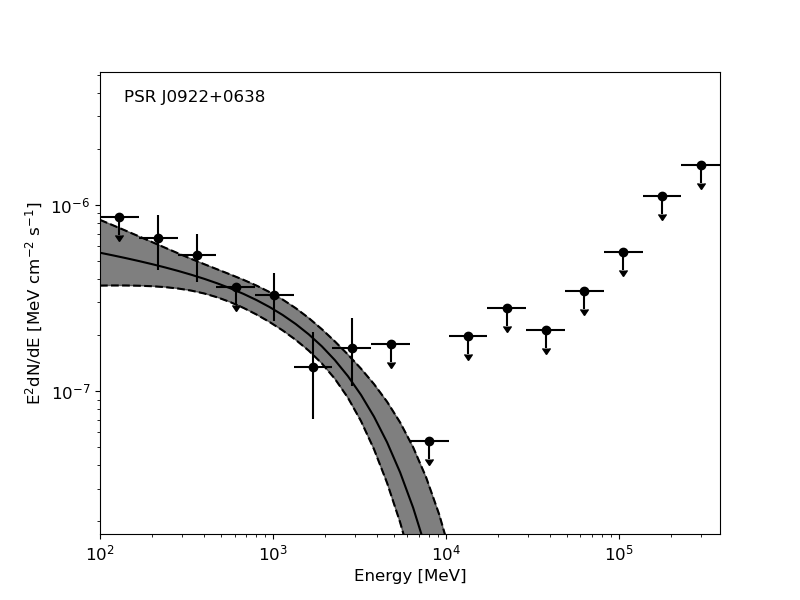

In [48]:
Image('psr_j0922+0638_sed.png')

Now to this point we can save the secondary results after we found all the new sources and done the localization and everything:

In [49]:
gta.write_roi(name+'_newsources_localized')

2021-07-06 15:53:50 INFO    GTBinnedAnalysis.write_xml(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_newsources_localized_00.xml...
2021-07-06 15:53:50 INFO    GTAnalysis.write_fits(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_newsources_localized.fits...
2021-07-06 15:54:05 INFO    GTAnalysis.write_roi(): Writing /data/users/ysong/Fermipy_Tutorial/PSR J0922+0638_newsources_localized.npy...


Now for the next parts of the tutorial, let's try 

1) Create a new analysis by loading from the previously saved analysis results;

2) Manitulate the source model (add and delete sources, set certain parameters free, etc...)

3) And fit again.

In [50]:
gta_2 = GTAnalysis.create(name+'_newsources_localized.fits') #This is loading the analysis from what we just saved in the previous steo

2021-07-06 15:58:29 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2021-07-06 15:58:30 INFO    GTAnalysis.setup(): Running setup.
2021-07-06 15:58:30 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2021-07-06 15:58:30 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2021-07-06 15:58:30 INFO    GTBinnedAnalysis.setup(): Using external LT cube.
/data/shared_data/anaconda3/envs/fermipy/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/data/shared_data/anaconda3/envs/fermipy/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: U

As you can see, none of the Fermi tools were called here - what has been done was merely to load all the proper files again to a new GTAnalysis class object, and set up the following analysis. If you do gta_v2.print_roi(), you'll find it should be exactly the same as if you read if from np.load(name+'_newsources_localized.py')

What we're going to do next is moot, but we just really want to test out the ability of Fermipy to manipulate model files. So let's have a look on how to do that.

In [ ]:
gta_2.free_sources()